In [61]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_excel('../data/raw/Crisis_reports 2015-Present.xlsx')
# ../data_folder/data.csv

In [48]:
df.head()

,Behavioral Crisis Num,CAD Event ID,Disposition,Exhibiting Behavior (group),Offense/Incident Ind,Subject Age,Subject Gender,Subject Race,Techniques Used,UoF Indicator,Weapons Involved,Reported Date (Date)
0,43653,2015000159907,NO ACTION POSSIBLE/NECESSARY,-,-,-1,-,-,-,NO,-,2015-05-15
1,43719,2015000160408,UNABLE TO CONTACT,-,-,-1,-,-,-,NO,-,2015-05-16
2,43845,2015000160465,RESOURCES DECLINED,-,-,-1,-,-,-,NO,-,2015-05-16
3,43992,2015000159631,GERIATRIC REGIONAL ASSESSMENT TEAM,-,-,-1,-,-,-,NO,-,2015-05-15
4,44102,-1,VOLUNTARY COMMITTAL,-,-,-1,-,-,-,NO,-,2015-05-16


In [5]:
df.dtypes

Behavioral Crisis Num                   int64
CAD Event ID                            int64
Disposition                            object
Exhibiting Behavior (group)            object
Offense/Incident Ind                   object
Subject Age                             int64
Subject Gender                         object
Subject Race                           object
Techniques Used                        object
UoF Indicator                          object
Weapons Involved                       object
Reported Date (Date)           datetime64[ns]
dtype: object

In [4]:
# df.columns

In [6]:
df.loc[:,df.dtypes == object] = df.loc[:,df.dtypes == object].apply(lambda x: x.str.strip().str.replace('#NAME?', '-'))


<ipython-input-6-ffd2d72bc747>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[:,df.dtypes == object] = df.loc[:,df.dtypes == object].apply(lambda x: x.str.strip().str.replace('#NAME?', '-'))


In [7]:
df['Disposition'] = df['Disposition'].str.upper().str.replace (" / ", "/", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.upper().str.replace ("BEHAVIOR – ", "", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace (" / ", "/", regex = True)
df['Exhibiting Behavior (group)'] = df['Exhibiting Behavior (group)'].str.replace ("\xa0", "", regex = True)
df['Offense/Incident Ind'] = df['Offense/Incident Ind'].str.upper()
df['Techniques Used'] = df['Techniques Used'].str.upper()
df['UoF Indicator'] = df['UoF Indicator'].str.replace ("N", "NO", regex = True)
df['UoF Indicator'] = df['UoF Indicator'].str.replace ("Y", "YES", regex = True)
df["Weapons Involved"] = df["Weapons Involved"].str.upper()
df['Weapons Involved'] = df['Weapons Involved'].str.replace("HANDGUN", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("RIFLE", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("SHOTGUN", "FIREARM", regex = True)
df['Weapons Involved'] = df['Weapons Involved'].str.replace ("OTHER FIREARM", "FIREARM", regex = True)

In [47]:
df.head()
# df.shape #(100032, 12)

,Behavioral Crisis Num,CAD Event ID,Disposition,Exhibiting Behavior (group),Offense/Incident Ind,Subject Age,Subject Gender,Subject Race,Techniques Used,UoF Indicator,Weapons Involved,Reported Date (Date)
0,43653,2015000159907,NO ACTION POSSIBLE/NECESSARY,-,-,-1,-,-,-,NO,-,2015-05-15
1,43719,2015000160408,UNABLE TO CONTACT,-,-,-1,-,-,-,NO,-,2015-05-16
2,43845,2015000160465,RESOURCES DECLINED,-,-,-1,-,-,-,NO,-,2015-05-16
3,43992,2015000159631,GERIATRIC REGIONAL ASSESSMENT TEAM,-,-,-1,-,-,-,NO,-,2015-05-15
4,44102,-1,VOLUNTARY COMMITTAL,-,-,-1,-,-,-,NO,-,2015-05-16


In [12]:
df['Exhibiting Behavior (group)'].unique() #len 27 previously 19

array(['-', 'BEHAVIOR - BELLIGERENT', 'BEHAVIOR - DISORDERLY',
       'BEHAVIOR - HALLUCINATIONS/DELUSIONS',
       'BEHAVIOR - NEGLECT/SELF CARE',
       'BEHAVIOR - OUT OF TOUCH WITH REALITY', 'BEHAVIOR - PARANOID',
       'BEHAVIOR - SUICIDE THREAT/ATTEMPT',
       'BEHAVIOR - UNUSUALLY FRIGHTENED/SCARED',
       'BELLIGERENT/UNCOOPERATIVE', 'BIZARRE/UNUSUAL',
       'COOPERATIVE/ATTENTIVE', 'DISORDERLY/DISRUPTIVE',
       'DISORGANIZED SPEECH/COMMUNICATION', 'DISORIENTATION/CONFUSION',
       'HALLUCINATIONS/DELUSIONS', 'HOPELESS/DEPRESSED', 'MANIC',
       'NEGLECT/SELF CARE', 'OTHER', 'OUT OF TOUCH WITH REALITY',
       'PARANOID', 'PHYSICALLY THREATENING/AGGRESSIVE',
       'SUICIDE BY COP (SBC)', 'SUICIDE THREAT/ATTEMPT',
       'UNUSUALLY FRIGHTENED/SCARED', 'VERBALLY THREATENING/AGGRESSIVE'],
      dtype=object)

In [13]:
df['Disposition'].unique()

array(['NO ACTION POSSIBLE/NECESSARY', 'UNABLE TO CONTACT',
       'RESOURCES DECLINED', 'GERIATRIC REGIONAL ASSESSMENT TEAM',
       'VOLUNTARY COMMITTAL', 'MOBILE CRISIS TEAM', 'CHRONIC COMPLAINT',
       '-', 'SUBJECT ARRESTED', 'SHELTER TRANSPORT',
       'EMERGENT DETENTION/ITA', 'CRISIS CLINIC',
       'MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED',
       'DRUG/ALCOHOL TREATMENT REFERRAL', 'DMHP REFERRAL',
       'MCT (MOBILE CRISIS TEAM)', 'ARRESTED (REQUIRES ARREST REPORT)',
       'RESOURCES OFFERED/DECLINED', 'OTHER',
       'CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)',
       'CASE MANAGER/MH AGENCY NOTIFIED', 'COURTESY TRANSPORT', 'DETOX',
       'SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL',
       'DMHP/REFERRAL (DCR)', 'CRISIS CLINIC (CRISIS CONNECTIONS)',
       'SPRUCE STREET', 'CRISIS RESPONSE BULLETIN REFERENCED', 'SHELTER',
       "CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)"], dtype=object)

In [64]:
dd = df['Disposition'].drop_duplicates() #len() 30 still 30
dd.unique()

array(['NO ACTION POSSIBLE/NECESSARY', 'UNABLE TO CONTACT',
       'RESOURCES DECLINED', 'GERIATRIC REGIONAL ASSESSMENT TEAM',
       'VOLUNTARY COMMITTAL', 'MOBILE CRISIS TEAM', 'CHRONIC COMPLAINT',
       '-', 'SUBJECT ARRESTED', 'SHELTER TRANSPORT',
       'EMERGENT DETENTION/ITA', 'CRISIS CLINIC',
       'MENTAL HEALTH AGENCY OR CASE MANAGER NOTIFIED',
       'DRUG/ALCOHOL TREATMENT REFERRAL', 'DMHP REFERRAL',
       'MCT (MOBILE CRISIS TEAM)', 'ARRESTED (REQUIRES ARREST REPORT)',
       'RESOURCES OFFERED/DECLINED', 'OTHER',
       'CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)',
       'CASE MANAGER/MH AGENCY NOTIFIED', 'COURTESY TRANSPORT', 'DETOX',
       'SOCIAL SERVICE/ALCOHOL AND DRUG/TREATMENT REFERRAL',
       'DMHP/REFERRAL (DCR)', 'CRISIS CLINIC (CRISIS CONNECTIONS)',
       'SPRUCE STREET', 'CRISIS RESPONSE BULLETIN REFERENCED', 'SHELTER',
       "CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)"], dtype=object)

In [67]:
len(df.isna())

100032

Text(0.5, 1.0, 'Exhibiting Behavior groups')

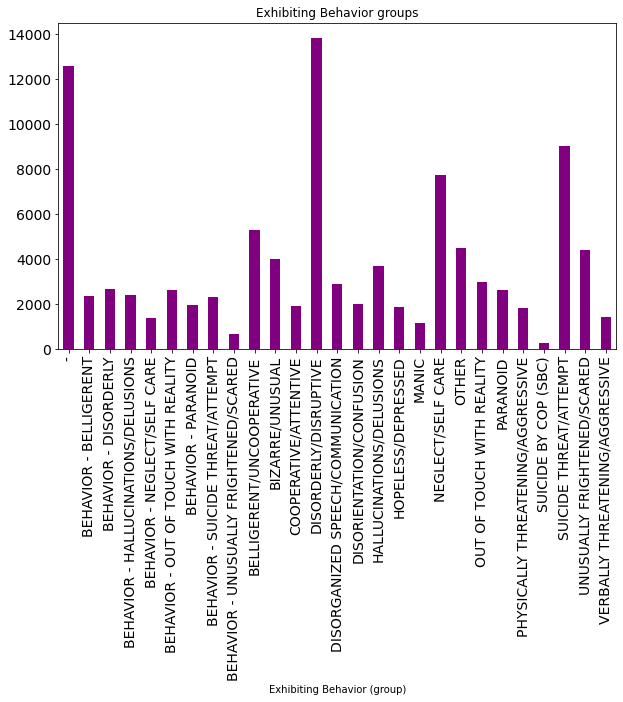

In [41]:
plot_bar = df.groupby(['Exhibiting Behavior (group)'])['Disposition'].count()
ax = plot_bar.plot(kind = 'bar', figsize = (10, 6), color= 'purple', fontsize=14)
ax.set_title('Exhibiting Behavior groups')


Text(0.5, 1.0, 'Disposition Type')

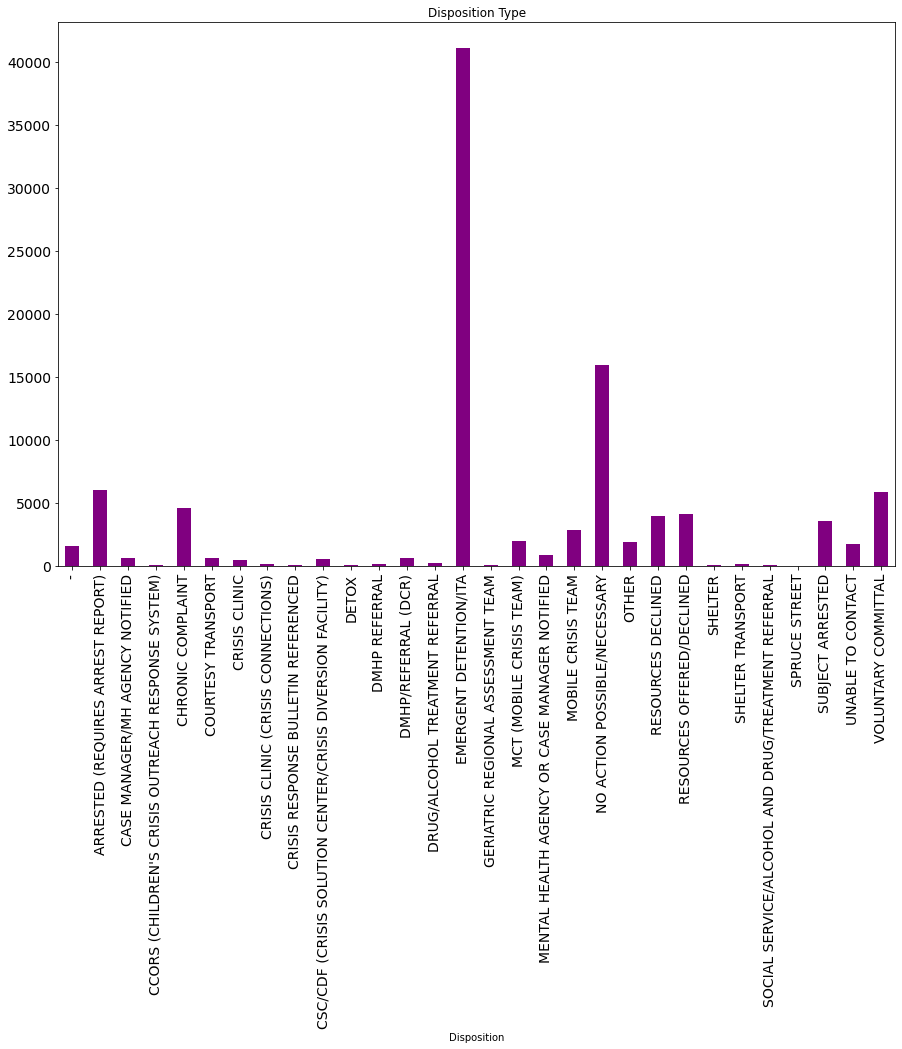

In [30]:
# plot_bar2 = df.groupby(['Disposition'])['Exhibiting Behavior (group)'].count()
plot_bar2 = df.groupby(['Disposition'])['Exhibiting Behavior (group)'].count()
ax2 = plot_bar2.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
ax2.set_title('Disposition Type')

In [40]:
df[df['Disposition']== 'EMERGENT DETENTION/ITA']['Disposition'].count() #41087
# df[df['Disposition']== 'EMERGENT DETENTION/ITA']

41087

In [57]:
# another method to get the bar plot for Disposition column
dis = df['Disposition'].value_counts()

Text(0.5, 1.0, 'Disposition Type')

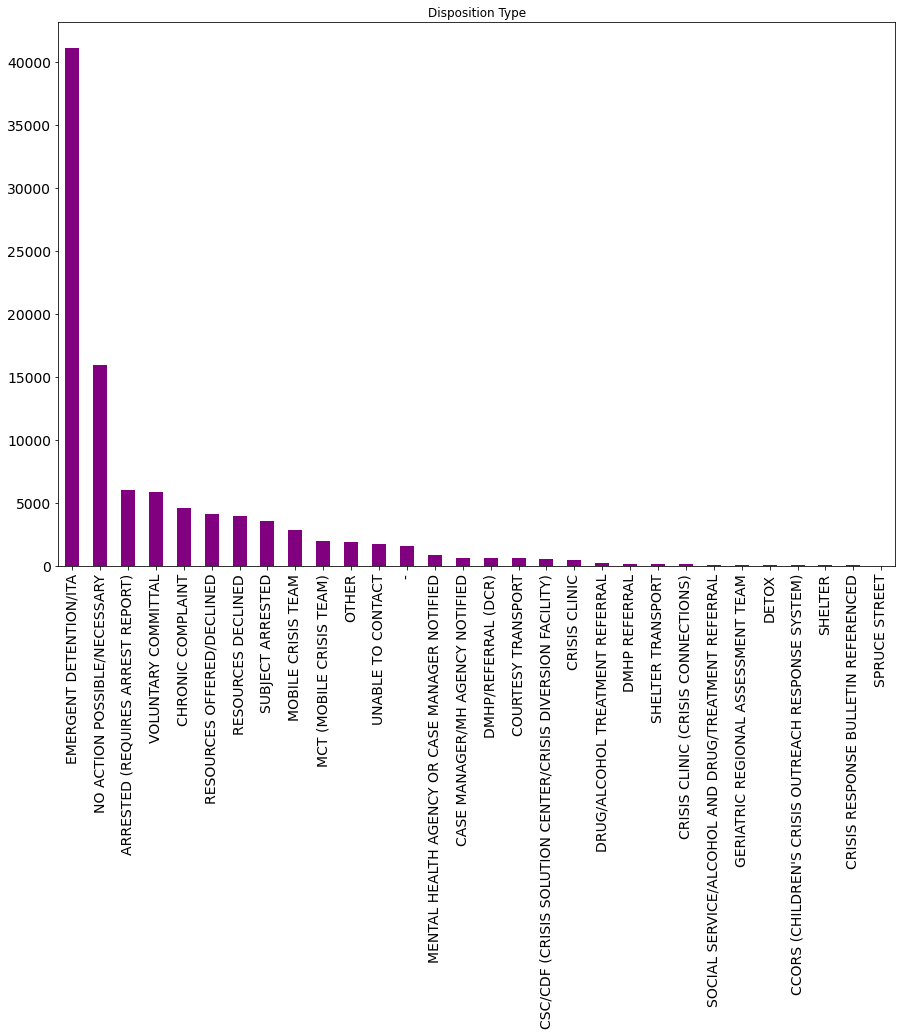

In [58]:
ax3 = dis.plot(kind = 'bar', figsize = (15, 10), color= 'purple', fontsize=14)
ax3.set_title('Disposition Type')

In [52]:
h = df.groupby('Disposition').size()
h

Disposition
-                                                              1618
ARRESTED (REQUIRES ARREST REPORT)                              6049
CASE MANAGER/MH AGENCY NOTIFIED                                 608
CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM)               66
CHRONIC COMPLAINT                                              4578
COURTESY TRANSPORT                                              596
CRISIS CLINIC                                                   471
CRISIS CLINIC (CRISIS CONNECTIONS)                              154
CRISIS RESPONSE BULLETIN REFERENCED                              34
CSC/CDF (CRISIS SOLUTION CENTER/CRISIS DIVERSION FACILITY)      575
DETOX                                                            72
DMHP REFERRAL                                                   155
DMHP/REFERRAL (DCR)                                             606
DRUG/ALCOHOL TREATMENT REFERRAL                                 236
EMERGENT DETENTION/ITA              

In [17]:
df["Exhibiting Behavior (group)"].value_counts()

DISORDERLY/DISRUPTIVE                     13795
-                                         12575
SUICIDE THREAT/ATTEMPT                     8999
NEGLECT/SELF CARE                          7713
BELLIGERENT/UNCOOPERATIVE                  5274
OTHER                                      4492
UNUSUALLY FRIGHTENED/SCARED                4371
BIZARRE/UNUSUAL                            3993
HALLUCINATIONS/DELUSIONS                   3677
OUT OF TOUCH WITH REALITY                  2975
DISORGANIZED SPEECH/COMMUNICATION          2881
BEHAVIOR - DISORDERLY                      2645
PARANOID                                   2625
BEHAVIOR - OUT OF TOUCH WITH REALITY       2614
BEHAVIOR - HALLUCINATIONS/DELUSIONS        2396
BEHAVIOR - BELLIGERENT                     2361
BEHAVIOR - SUICIDE THREAT/ATTEMPT          2314
DISORIENTATION/CONFUSION                   1999
BEHAVIOR - PARANOID                        1923
COOPERATIVE/ATTENTIVE                      1908
HOPELESS/DEPRESSED                      

In [45]:
df[df['Subject Age']==-1].count() #43603

Behavioral Crisis Num          43603
CAD Event ID                   43603
Disposition                    43603
Exhibiting Behavior (group)    43603
Offense/Incident Ind           43603
Subject Age                    43603
Subject Gender                 43603
Subject Race                   43603
Techniques Used                43603
UoF Indicator                  43603
Weapons Involved               43603
Reported Date (Date)           43603
dtype: int64

In [59]:
my_contingency_table = pd.crosstab(index=df["Disposition"], columns=df["Exhibiting Behavior (group)"]) #rows is index
my_contingency_table

Exhibiting Behavior (group),-,BEHAVIOR - BELLIGERENT,BEHAVIOR - DISORDERLY,BEHAVIOR - HALLUCINATIONS/DELUSIONS,BEHAVIOR - NEGLECT/SELF CARE,BEHAVIOR - OUT OF TOUCH WITH REALITY,BEHAVIOR - PARANOID,BEHAVIOR - SUICIDE THREAT/ATTEMPT,BEHAVIOR - UNUSUALLY FRIGHTENED/SCARED,BELLIGERENT/UNCOOPERATIVE,...,MANIC,NEGLECT/SELF CARE,OTHER,OUT OF TOUCH WITH REALITY,PARANOID,PHYSICALLY THREATENING/AGGRESSIVE,SUICIDE BY COP (SBC),SUICIDE THREAT/ATTEMPT,UNUSUALLY FRIGHTENED/SCARED,VERBALLY THREATENING/AGGRESSIVE
Disposition,,,,,,,,,,,,,,,,,,,,,
-,522,0,0,0,0,0,0,0,0,61,...,0,169,126,0,0,0,0,158,174,0
ARRESTED (REQUIRES ARREST REPORT),202,526,482,192,105,343,192,130,39,533,...,126,93,174,278,155,391,41,135,31,285
CASE MANAGER/MH AGENCY NOTIFIED,21,23,33,26,7,26,16,8,10,26,...,15,17,30,32,33,19,1,12,9,17
CCORS (CHILDREN'S CRISIS OUTREACH RESPONSE SYSTEM),0,2,4,0,2,1,1,3,3,7,...,1,1,10,3,0,5,0,3,0,3
CHRONIC COMPLAINT,1151,53,65,102,17,100,63,10,20,240,...,20,400,190,93,124,12,0,213,461,12
COURTESY TRANSPORT,37,10,15,29,10,26,29,9,17,20,...,9,10,37,27,47,1,0,12,17,4
CRISIS CLINIC,142,0,0,0,0,0,0,0,0,7,...,0,47,36,0,0,0,0,70,89,0
CRISIS CLINIC (CRISIS CONNECTIONS),11,3,5,4,4,4,8,3,3,11,...,3,1,2,5,17,7,0,2,4,0
CRISIS RESPONSE BULLETIN REFERENCED,2,2,3,7,1,3,3,0,0,1,...,0,0,3,0,0,0,1,0,0,1


<AxesSubplot:xlabel='Exhibiting Behavior (group)', ylabel='Disposition'>

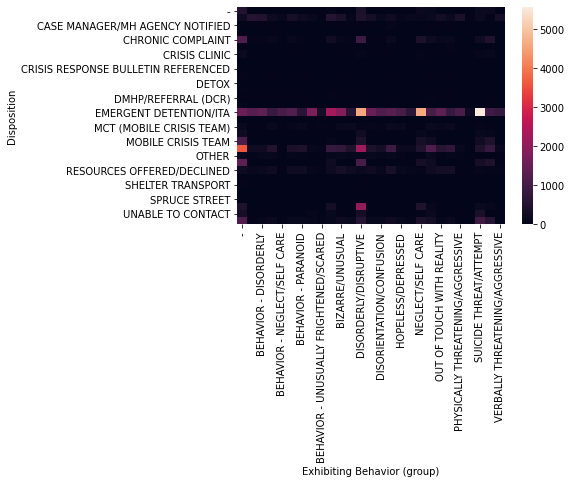

In [62]:
sns.heatmap(my_contingency_table)